# Search ArcGIS Online and Add Content to a Leaflet Map

This sample R-Notebook demonstrates how to search ArcGIS Online for content, explore a content item, and then add it to a Leaflet map. Specifically, this notebook will showcase:
- Using ```httr``` log into ArcGIS Online and search for content.
- Exploring a selected content item with R.
- Reprojecting data using ```sf``` and ```st_transform``` to reproject.
- Visualizing the content item on a Leaflet map.

## Packages

The following packages will be used in this sample.
- **leaflet** - Interactive mapping with Leaflet JS library
- **leaflet.esri** - Support for Esri Leaflet maps
- **sf** - Provides simple spatial features access
- **sp** - Class and methods for interacting with spatial data
- **jsonlite** - A low-weight JSON parser
- **httr** - Used to make http requests (for example, POST and GET)
- **arcgisbinding** - R-ArcGIS bridge, moves, wrangles, and maps geospatial data

In [1]:
if(!require(leaflet)){
  install.packages("leaflet")
  library(leaflet)
}
if(!require(leaflet.esri)){
  install.packages("leaflet.esri")
  library(leaflet.esri)
}
if(!require(sf)){
  install.packages("sf")
  library(sf)
}
if(!require(sp)){
  install.packages("sp")
  library(sp)
}
if(!require(jsonlite)){
  install.packages("jsonlite")
  library(jsonlite)
}
if(!require(httr)){
  install.packages("httr")
  library(httr)
}
library(arcgisbinding)

Loading required package: leaflet
Loading required package: leaflet.esri
Warning message:
"package 'leaflet.esri' was built under R version 3.6.3"Loading required package: leaflet.extras
Warning message:
"package 'leaflet.extras' was built under R version 3.6.3"Loading required package: sf
Warning message:
"package 'sf' was built under R version 3.6.3"Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1
Loading required package: sp
Loading required package: jsonlite
Loading required package: httr
*** Please call arc.check_product() to define a desktop license.


### Binding to an ArcGIS Pro License
```arc.check_product()``` function binds to a valid version of ArcGIS Pro and defines the following:
- ArcGIS product and its version
- Type of license
- Version of arcgisbinding

In [2]:
arc.check_product()

product: ArcGIS Pro (13.0.2.36056)
license: Advanced
version: 1.0.1.300

### Connecting ```arcgisbinging``` to Portal
You can sign in to the portal with ```arc.portal_connect```.

If you are already signed in ArcGIS Pro, ```arc.portal_connect``` will connect to the portal without login information. If you are not signed in to the portal in ArcGIS Pro, you can provide your login details. Define the AGOL or portal URL, username, adn password, and then use ```arc.portal_connect``` to log into AGOL or portal.

In [3]:
agol_url <- "https://learngis.maps.arcgis.com/"
un <- "****"
pw <- "####"

connection <- arc.portal_connect(agol_url, un, pw)
connection

*** Current
  url		: https://learngis.maps.arcgis.com/
  version	: 10.3
  user		: gbrunner_LearnGIS
  organization	: Learn ArcGIS
*** Available (signed in)
  'https://ads-qual.imagery.esri.com/portal/'
  'https://www.arcgis.com/'
*** Not signed in
  'https://prof-services.maps.arcgis.com/'
  'https://ps-dbs.maps.arcgis.com/'
  'https://ra-webgis.esri-ps.com/portal/'
  'https://slustl.maps.arcgis.com/'
  'https://usfs-ads-dev.esriemcs.com/portal/'
  'https://usfs-gis-dev.esriemcs.com/portal/'

The connection contains more iformation than just the portals you have access to. It also gives you a token, ```connection$token```. That token can then be used to search for content in your ArcGIS Online or portal account.

In [4]:
print(connection$user)
print(connection$organization)
print(connection$token)

[1] "gbrunner_LearnGIS"
[1] "Learn ArcGIS"
[1] "0vKFB3Ssp4PKKqmv43LKpfhNaL7TPIJFP7h41rkrIB1tPG9CdU5A2oxaLPbLY74slKlm_8RcdHnoioqoNfYdBKZ3bklYUIs5O4iJ-Iza_TGMKV10LCDuUZNxdVgAGCvOkkYYUPgOrf0Dbdobfx79KN4WnL55FvcStGi7biLZcS6p9knI6EUoK7HTJ7ihN1w9qIqPIqxSvvYa3LOyrwcdVCxNaVs-Wy9jymFf5nhpMDNGAmEsJrYBYtOzJWwMf6Zh"


## Search ArcGIS Online for Content

Using ```httr```, submit a ```POST``` request to your portal using the ArcGIS REST API and your portal information. First, define a ```search``` function that you can use to search AGOL. 

In [5]:
search <- function(url, token, q){
    resp <- POST(
        url = paste(url,"/sharing/rest/search?", sep=""),
        body = list(num=10,
                    start=0,
                    sortField="title",
                    sortOrder="asc",
                    type = "feature service",
                    q = q,
                    f = "json",
                    token=token)
    )
    obj_list <- content(resp)
    return(obj_list)
}

After defining the search function, use it by passing the portal URL, token, and search parameters to the function. By calling the object that is returned by the function, you will see all of the metadata associated with the items that your search found.

In [6]:
items <- search(agol_url, connection$token, "owner:gbrunner_LearnGIS AND NJ AND type:feature service")
items

$total
[1] 4

$start
[1] 1

$num
[1] 10

$nextStart
[1] -1

$results
$results[[1]]
$results[[1]]$id
[1] "1cd43deff37b4b73bf7694aece23c0ff"

$results[[1]]$owner
[1] "gbrunner_LearnGIS"

$results[[1]]$created
[1] 1.59961e+12

$results[[1]]$isOrgItem
[1] TRUE

$results[[1]]$modified
[1] 1.664301e+12

$results[[1]]$guid
NULL

$results[[1]]$name
NULL

$results[[1]]$title
[1] "NJ_Demographic_Layer"

$results[[1]]$type
[1] "Feature Service"

$results[[1]]$typeKeywords
$results[[1]]$typeKeywords[[1]]
[1] "ArcGIS Server"

$results[[1]]$typeKeywords[[2]]
[1] "Data"

$results[[1]]$typeKeywords[[3]]
[1] "Feature Access"

$results[[1]]$typeKeywords[[4]]
[1] "Feature Service"

$results[[1]]$typeKeywords[[5]]
[1] "Metadata"

$results[[1]]$typeKeywords[[6]]
[1] "Service"

$results[[1]]$typeKeywords[[7]]
[1] "Singlelayer"

$results[[1]]$typeKeywords[[8]]
[1] "Hosted Service"


$results[[1]]$description
NULL

$results[[1]]$tags
$results[[1]]$tags[[1]]
[1] "ArcGIS Learn"

$results[[1]]$tags[[2]]
[1] "Learn Lesson"


$results[[1]]$snippet
NULL

$results[[1]]$thumbnail
[1] "thumbnail/ago_downloaded.png"

$results[[1]]$documentation
NULL

$results[[1]]$extent
$results[[1]]$extent[[1]]
$results[[1]]$extent[[1]][[1]]
[1] -75.55945

$results[[1]]$extent[[1]][[2]]
[1] 38.92902


$results[[1]]$extent[[2]]
$results[[1]]$extent[[2]][[1]]
[1] -73.90234

$results[[1]]$extent[[2]][[2]]
[1] 41.35742



$results[[1]]$categories
list()

$results[[1]]$spatialReference
[1] "102100"

$results[[1]]$accessInformation
NULL

$results[[1]]$licenseInfo
NULL

$results[[1]]$culture
[1] "english (united states)"

$results[[1]]$properties
NULL

$results[[1]]$advancedSettings
NULL

$results[[1]]$url
[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a9e29a/FeatureServer"

$results[[1]]$proxyFilter
NULL

$results[[1]]$access
[1] "public"

$results[[1]]$size
[1] -1

$results[[1]]$subInfo
[1] 0

$results[[1]]$appCategories
list()

$results[[1]]$industries
list()

$results[[1]]$languages
list()

$results[[1]]$largeThumbnail
NULL

$results[[1]]$banner
NULL

$results[[1]]$screenshots
list()

$results[[1]]$listed
[1] FALSE

$results[[1]]$ownerFolder
NULL

$results[[1]]$protected
[1] FALSE

$results[[1]]$numComments
[1] 0

$results[[1]]$numRatings
[1] 0

$results[[1]]$avgRating
[1] 0

$results[[1]]$numViews
[1] 5

$results[[1]]$scoreCompleteness
[1] 41

$results[[1]]$groupDesignations
NULL

$results[[1]]$contentOrigin
[1] "self"

$results[[1]]$lastViewed
[1] 1.671203e+12


$results[[2]]
$results[[2]]$id
[1] "9791fd31b5164264bcce64d2b50b0326"

$results[[2]]$owner
[1] "gbrunner_LearnGIS"

$results[[2]]$created
[1] 1.599845e+12

$results[[2]]$isOrgItem
[1] TRUE

$results[[2]]$modified
[1] 1.599845e+12

$results[[2]]$guid
NULL

$results[[2]]$name
NULL

$results[[2]]$title
[1] "NJ_Demographic_Layer"

$results[[2]]$type
[1] "Feature Service"

$results[[2]]$typeKeywords
$results[[2]]$typeKeywords[[1]]
[1] "ArcGIS Server"

$results[[2]]$typeKeywords[[2]]
[1] "Data"

$results[[2]]$typeKeywords[[3]]
[1] "Feature Access"

$results[[2]]$typeKeywords[[4]]
[1] "Feature Service"

$results[[2]]$typeKeywords[[5]]
[1] "Metadata"

$results[[2]]$typeKeywords[[6]]
[1] "Service"

$results[[2]]$typeKeywords[[7]]
[1] "Singlelayer"

$results[[2]]$typeKeywords[[8]]
[1] "Hosted Service"


$results[[2]]$description
NULL

$results[[2]]$tags
$results[[2]]$tags[[1]]
[1] "ArcGIS Learn"

$results[[2]]$tags[[2]]
[1] "Learn Lesson"


$results[[2]]$snippet
NULL

$results[[2]]$thumbnail
NULL

$results[[2]]$documentation
NULL

$results[[2]]$extent
$results[[2]]$extent[[1]]
$results[[2]]$extent[[1]][[1]]
[1] -75.55945

$results[[2]]$extent[[1]][[2]]
[1] 38.92902


$results[[2]]$extent[[2]]
$results[[2]]$extent[[2]][[1]]
[1] -73.90234

$results[[2]]$extent[[2]][[2]]
[1] 41.35742



$results[[2]]$categories
list()

$results[[2]]$spatialReference
[1] "102100"

$results[[2]]$accessInformation
NULL

$results[[2]]$licenseInfo
NULL

$results[[2]]$culture
[1] "english (united states)"

$results[[2]]$properti

### Important Item Metadata

The ```items``` object contains all the metadata associated with your search results. For example, loop over the item list and print out the item **title**, **spatial reference**, and service **url**.

In [7]:
for (val in 1:items$total){
    print(items$results[[val]]$title)
    print(paste("Spatial Reference:",items$results[[val]]$spatialReference))
    print(items$results[[val]]$url)
}

[1] "NJ_Demographic_Layer"
[1] "Spatial Reference: 102100"
[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a9e29a/FeatureServer"
[1] "NJ_Demographic_Layer"
[1] "Spatial Reference: 102100"
[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a2fca3/FeatureServer"
[1] "NJ_Demographic_Layer_YOURINITIALS"
[1] "Spatial Reference: 102100"
[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/aa298b/FeatureServer"
[1] "NJ_Demographics"
[1] "Spatial Reference: 102100"
[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/ab95a0/FeatureServer"


### Examining Feature Service Metadata

The above information is corresponds to the AGOL or portal item. In order to understand the service, we need to query the feature service URL. Do that using a ```GET``` request. Below is the function that will return the feature service info.

In [8]:
service_info <- function(url, token){
    query_url <- paste(
        url, 
        "?f=pjson&token=", 
        token, 
        sep=""
    )
    r <- GET(
        url = query_url
    )
    return(content(r))
}

Call that function to get the service information and print it out.

In [9]:
li <- service_info(items$results[[1]]$url, connection$token)
li

$currentVersion
[1] 11

$serviceItemId
[1] "1cd43deff37b4b73bf7694aece23c0ff"

$serviceDescription
[1] ""

$hasVersionedData
[1] FALSE

$supportsDisconnectedEditing
[1] FALSE

$hasStaticData
[1] TRUE

$hasSharedDomains
[1] FALSE

$maxRecordCount
[1] 2000

$supportedQueryFormats
[1] "JSON"

$supportsVCSProjection
[1] FALSE

$supportedExportFormats
[1] "csv,shapefile,sqlite,geoPackage,filegdb,featureCollection,geojson,excel"

$capabilities
[1] "Query"

$description
[1] ""

$copyrightText
[1] ""

$spatialReference
$spatialReference$wkid
[1] 102100

$spatialReference$latestWkid
[1] 3857


$initialExtent
$initialExtent$xmin
[1] -8411240

$initialExtent$ymin
[1] 4711510

$initialExtent$xmax
[1] -8226771

$initialExtent$ymax
[1] 5065205

$initialExtent$spatialReference
$initialExtent$spatialReference$wkid
[1] 102100

$initialExtent$spatialReference$latestWkid
[1] 3857



$fullExtent
$fullExtent$xmin
[1] -8411240

$fullExtent$ymin
[1] 4711510

$fullExtent$xmax
[1] -8226771

$fullExtent$ymax
[1] 5065205

$fullExtent$spatialReference
$fullExtent$spatialReference$wkid
[1] 102100

$fullExtent$spatialReference$latestWkid
[1] 3857



$allowGeometryUpdates
[1] TRUE

$units
[1] "esriMeters"

$supportsAppend
[1] TRUE

$supportsSharedDomains
[1] TRUE

$supportsWebHooks
[1] TRUE

$supportsTemporalLayers
[1] TRUE

$layerOverridesEnabled
[1] TRUE

$size
[1] 278528

$syncEnabled
[1] FALSE

$supportsApplyEditsWithGlobalIds
[1] FALSE

$supportsReturnDeleteResults
[1] TRUE

$supportsLayerOverrides
[1] TRUE

$supportsTilesAndBasicQueriesMode
[1] TRUE

$supportsQueryContingentValues
[1] TRUE

$supportedContingentValuesFormats
[1] "JSON, PBF"

$supportsContingentValuesJson
[1] 2

$advancedEditingCapabilities
$advancedEditingCapabilities$supportsSplit
[1] FALSE

$advancedEditingCapabilities$supportsReturnServiceEditsInSourceSR
[1] FALSE

$advancedEditingCapabilities$supportsAsyncApplyEdits
[1] TRUE

$advancedEditingCapabilities$supportsReturnEditResults
[1] TRUE


$editorTrackingInfo
$editorTrackingInfo$enableEditorTracking
[1] FALSE

$editorTrackingInfo$enableOwnershipAccessControl
[1] FALSE

$editorTrackingInfo$allowOthersToQuery
[1] TRUE

$editorTrackingInfo$allowOthersToUpdate
[1] TRUE

$editorTrackingInfo$allowOthersToDelete
[1] FALSE

$editorTrackingInfo$allowAnonymousToQuery
[1] TRUE

$editorTrackingInfo$allowAnonymousToUpdate
[1] TRUE

$editorTrackingInfo$allowAnonymousToDelete
[1] TRUE


$xssPreventionInfo
$xssPreventionInfo$xssPreventionEnabled
[1] TRUE

$xssPreventionInfo$xssPreventionRule
[1] "InputOnly"

$xssPreventionInfo$xssInputRule
[1] "rejectInvalid"


$layers
$layers[[1]]
$layers[[1]]$id
[1] 0

$layers[[1]]$name
[1] "aead1dc8"

$layers[[1]]$parentLayerId
[1] -1

$layers[[1]]$defaultVisibility
[1] TRUE

$layers[[1]]$subLayerIds
NULL

$layers[[1]]$minScale
[1] 36978596

$layers[[1]]$maxScale
[1] 144447

$layers[[1]]$type
[1] "Feature Layer"

$layers[[1]]$geometryType
[1] "esriGeometryPolygon"



$tables
list()

### Form the Feature Service Layer URL
The item has only one layer in it. Use the lauer **url** and **id** to form the full URL to access the feaure service. This will be the URL that is used to read in the features and plot them on a Leaflet map.

In [10]:
feature_service <- paste(items$results[[1]]$url, "/", li$layers[[1]]$id, sep="")
print(feature_service)

[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a9e29a/FeatureServer/0"


## Open and Read the Feature Service with ArcGIS-R Binding

### Read a Feature Service
Once you are logged in, you can read data with ```arc.open```.

In [11]:
arc.fs <- arc.open(feature_service)
arc.fs

dataset_type    : FeatureClass
path            : https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a9e29a/FeatureServer/0 
fields          : OBJECTID, ID, NAME, ST_ABBREV, TOTPOP_CY, HHPOP_CY, 
fields          : POPDENS_CY, TOTHH_CY, AVGHHSZ_CY, POPGRW10CY, HHGRW10CY, 
fields          : GENALPHACY, GENZ_CY, MILLENN_CY, GENX_CY, BABYBOOMCY, 
fields          : OLDRGENSCY, GENBASE_CY, POP0_CY, POP5_CY, POP10_CY, POP15_CY, 
fields          : POP20_CY, POP25_CY, POP30_CY, POP35_CY, POP40_CY, POP45_CY, 
fields          : POP50_CY, POP55_CY, POP60_CY, POP65_CY, POP70_CY, POP75_CY, 
fields          : POP80_CY, POP85_CY, MEDAGE_CY, MALES_CY, MEDMAGE_CY, 
fields          : FEMALES_CY, MEDFAGE_CY, AGEBASE_CY, CIVLBFR_CY, EMP_CY, 
fields          : UNEMP_CY, UNEMPRT_CY, HISPPOP_CY, NHSPWHT_CY, NHSPBLK_CY, 
fields          : NHSPAI_CY, NHSPASN_CY, NHSPPI_CY, NHSPOTH_CY, NHSPMLT_CY, 
fields          : DIVINDX_CY, RACEBASECY, HINC0_CY, HINC15_CY, HINC25_CY, 
fields          : HINC35_

### Load Feature Service into Data Frame
Then use ```arc.select``` to load that dataset into a dataframe.

In [12]:
nj <- arc.select(arc.fs)
nj

OBJECTID ID    NAME              ST_ABBREV TOTPOP_CY HHPOP_CY POPDENS_CY
1   1       34001 Atlantic County   NJ        275753    269538     496.2   
2   2       34003 Bergen County     NJ        951353    940931    4082.9   
3   3       34005 Burlington County NJ        459512    446415     575.4   
4   4       34007 Camden County     NJ        522513    514727    2361.5   
5   5       34009 Cape May County   NJ         93384     90773     371.4   
6   6       34011 Cumberland County NJ        155971    145189     322.5   
7   7       34013 Essex County      NJ        809316    785907    6412.3   
8   8       34015 Gloucester County NJ        299200    294977     929.2   
9   9       34017 Hudson County     NJ        693538    684066   15014.6   
10 10       34019 Hunterdon County  NJ        128365    124794     300.0   
11 11       34021 Mercer County     NJ        375350    354819    1671.5   
12 12       34023 Middlesex County  NJ        853646    830233    2763.4   
13 13       34025 Monmouth County   NJ        638701    631344    1362.4   
14 14       34027 Morris County     NJ        506503    497800    1100.7   
15 15       34029 Ocean County      NJ        606422    599245     964.4   
16 16       34031 Passaic County    NJ        516266    505214    2796.8   
17 17       34033 Salem County      NJ         64864     63607     195.4   
18 18       34035 Somerset County   NJ        341107    336994    1130.2   
19 19       34037 Sussex County     NJ        146888    145146     283.0   
20 20       34039 Union County      NJ        565061    558240    5493.8   
21 21       34041 Warren County     NJ        109165    107197     305.9   
   TOTHH_CY AVGHHSZ_CY POPGRW10CY ... TOTHU_CY OWNER_CY RENTER_CY OOMORT10
1  101693   2.65        0.05      ... 126647    64656    37037     50675  
2  348209   2.70        0.61      ... 366255   221653   126556    154617  
3  169456   2.63        0.29      ... 180190   126850    42606     98323  
4  192177   2.68        0.21      ... 207422   132011    60166     97297  
5   39084   2.32       -0.49      ... 101349    29231     9853     19314  
6   51659   2.81       -0.07      ...  56513    32050    19609     22804  
7  291573   2.70        0.39      ... 324157   121743   169830     97293  
8  107861   2.73        0.45      ... 114491    84914    22947     63424  
9  268251   2.55        1.09      ... 296476    78481   189770     59785  
10  47622   2.62        0.00      ...  50391    39778     7844     30370  
11 135811   2.61        0.29      ... 146498    84318    51493     64356  
12 293110   2.83        0.64      ... 307092   185993   107117    136540  
13 236893   2.67        0.16      ... 263016   170640    66253    131005  
14 184898   2.69        0.35      ... 195173   134543    50355    100161  
15 229473   2.61        0.61      ... 288624   179816    49657    116259  
16 169552   2.98        0.36      ... 179332    88982    80570     66925  
17  24671   2.58       -0.23      ...  27417    17131     7540     11969  
18 122919   2.74        0.65      ... 128673    88007    34912     68996  
19  53884   2.69       -0.19      ...  62057    44036     9848     36490  
20 195510   2.86        0.63      ... 207084   113015    82495     82267  
21  41907   2.56        0.05      ...  45897    29835    12072     23142  
   OONOMORT10 POPOWN10 POPRENT10 VACANT_CY Shape__Area_2 Shape__Length_2
1  19481      188091    80412    24954     2434608642    1120338.1      
2  67349      629797   264897    18046     1081104512     248684.9      
3  31333      352757    82763    10734     3587211268     332502.7      
4  33058      364687   141556    15245      984644939     201369.9      
5  10841       70793    23844    62265     1090255305     996190.6      
6  11818       94802    49985     4854     2152013110     376676.1      
7  31053      378221   381976    32584      577132062     133400.1      
8  20101      236998    47067     6630     1437878433     226030.2      
9  19278      210527   4

## Converting Data to Spatial R Data Structures

```arc.data2sf``` and ````arc.data2sp``` allow converting feature service and feature classes to spatial data frame types recognized by R language. ```sf``` and ```sp``` are frequently used spatial data structures in R. The code below conerts the data to a spatial dataframe and then plots maps of the data and the first 10 fields in the data frame.

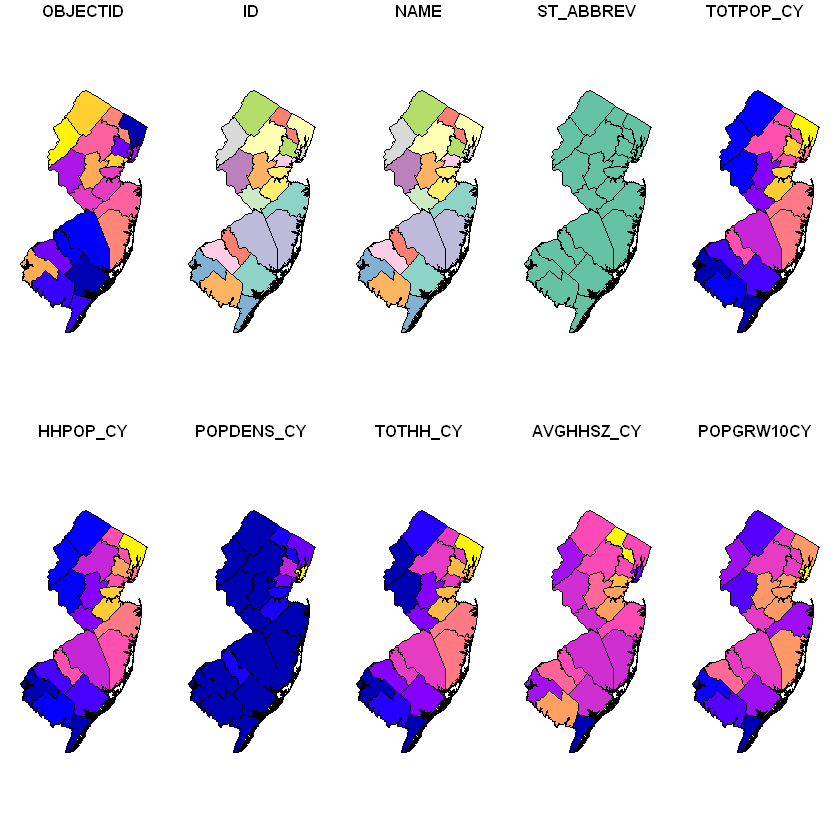

In [13]:
nj.sf <- arc.data2sf(nj)
plot(nj.sf, max.plot = 10)

## Reprojecting 

ArcGIS feature services support all spatial references, however, in order to plot the data on a Leaflet map, the data must be in **WGS84**. Use ```st_transform``` to reproject the dataframe into **WGS84**. NOtice that the 

In [14]:
nj_wgs84 <- st_transform(nj.sf, crs = 4326)
nj_wgs84

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

OBJECTID,ID,NAME,ST_ABBREV,TOTPOP_CY,HHPOP_CY,POPDENS_CY,TOTHH_CY,AVGHHSZ_CY,POPGRW10CY,geom,...,OWNER_CY,RENTER_CY,OOMORT10,OONOMORT10,POPOWN10,POPRENT10,VACANT_CY,Shape__Area_2,Shape__Length_2,geom
1,34001,Atlantic County,NJ,275753,269538,496.2,101693,2.65,0.05,MULTIPOLYGON (((-74.65298 3...,...,64656,37037,50675,19481,188091,80412,24954,2434608642,1120338.1,MULTIPOLYGON (((-74.65298 3...
2,34003,Bergen County,NJ,951353,940931,4082.9,348209,2.70,0.61,POLYGON ((-73.9057 40.98407...,...,221653,126556,154617,67349,629797,264897,18046,1081104512,248684.9,POLYGON ((-73.9057 40.98407...
3,34005,Burlington County,NJ,459512,446415,575.4,169456,2.63,0.29,MULTIPOLYGON (((-74.43647 3...,...,126850,42606,98323,31333,352757,82763,10734,3587211268,332502.7,MULTIPOLYGON (((-74.43647 3...
4,34007,Camden County,NJ,522513,514727,2361.5,192177,2.68,0.21,MULTIPOLYGON (((-75.09404 3...,...,132011,60166,97297,33058,364687,141556,15245,984644939,201369.9,MULTIPOLYGON (((-75.09404 3...
5,34009,Cape May County,NJ,93384,90773,371.4,39084,2.32,-0.49,MULTIPOLYGON (((-74.90559 3...,...,29231,9853,19314,10841,70793,23844,62265,1090255305,996190.6,MULTIPOLYGON (((-74.90559 3...
6,34011,Cumberland County,NJ,155971,145189,322.5,51659,2.81,-0.07,MULTIPOLYGON (((-75.35728 3...,...,32050,19609,22804,11818,94802,49985,4854,2152013110,376676.1,MULTIPOLYGON (((-75.35728 3...
7,34013,Essex County,NJ,809316,785907,6412.3,291573,2.70,0.39,POLYGON ((-74.32383 40.9088...,...,121743,169830,97293,31053,378221,381976,32584,577132062,133400.1,POLYGON ((-74.32383 40.9088...
8,34015,Gloucester County,NJ,299200,294977,929.2,107861,2.73,0.45,MULTIPOLYGON (((-75.3695 39...,...,84914,22947,63424,20101,236998,47067,6630,1437878433,226030.2,MULTIPOLYGON (((-75.3695 39...
9,34017,Hudson County,NJ,693538,684066,15014.6,268251,2.55,1.09,MULTIPOLYGON (((-74.15794 4...,...,78481,189770,59785,19278,210527,414361,28225,209351354,170425.2,MULTIPOLYGON (((-74.15794 4...
10,34019,Hunterdon County,NJ,128365,124794,300.0,47622,2.62,0.00,POLYGON ((-74.72441 40.7194...,...,39778,7844,30370,9210,107939,15841,2769,1966731707,217945.4,POLYGON ((-74.72441 40.7194...


### Print our the Geometries

Notice that the geometries are now in **WGS84**.

In [15]:
nj_wgs84$geom

MULTIPOLYGON (((-74.65298 39.28955, -74.65798 3...
POLYGON ((-73.9057 40.98407, -73.93246 40.90373...
MULTIPOLYGON (((-74.43647 39.54687, -74.43608 3...
MULTIPOLYGON (((-75.09404 39.96893, -75.10554 3...
MULTIPOLYGON (((-74.90559 38.94876, -74.91131 3...
ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for m

Geometry set for 21 features 
Geometry type: GEOMETRY
Dimension:     XY
Bounding box:  xmin: -75.55945 ymin: 38.92902 xmax: -73.90234 ymax: 41.35742
Geodetic CRS:  WGS 84
First 5 geometries:

### Show a Series of an Attribute

You can also list out any attribute in the data frame.

In [16]:
nj_wgs84$TOTPOP_CY

[1] 275753 951353 459512 522513  93384 155971 809316 299200 693538 128365
[11] 375350 853646 638701 506503 606422 516266  64864 341107 146888 565061
[21] 109165

## Visualize Features on Dyanmic Map

Using the [```Leaflet```](https://rstudio.github.io/leaflet/) package, we can add the features to a map. Below, we create a color palatte and map. Then, we add the features to the map. We also add a legend. 

In [17]:
pal <- colorNumeric("viridis", NULL)
L <- leaflet(elementId = "Test",nj_wgs84) %>%
     addProviderTiles(providers$Esri.WorldStreetMap) %>%
     addPolygons(stroke = FALSE, smoothFactor = 0.3, fillOpacity = 1,
                 fillColor = ~pal(log10(TOTPOP_CY)),
                 label = ~paste0(TOTPOP_CY, ": ", formatC(TOTPOP_CY, big.mark = ",")))  %>%

addLegend(pal = pal, values = nj_wgs84$TOTPOP_CY, title = "Total Population")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


### Display the Map

Call the object ```L``` and the map will display.

In [18]:
L

HTML widgets cannot be represented in plain text (need html)

![](../../image/NJ_Demographics.png)